In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import requests
from bs4 import BeautifulSoup as bs 

In [35]:
billionaires = pd.read_csv ('/Users/AudreyKoussou/Desktop/UCDPA_AudreyKoussou/Billionaires2022.csv')

In [36]:
billionaires

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,66.0,1000,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,01/09/1955,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,01/03/1963,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,06/03/1965,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,11/07/1978,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN


Indexing

In [5]:
billionaires.index 

RangeIndex(start=0, stop=2668, step=1)

In [75]:
billionaires.set_index('personName').head(2)

,rank,age,finalWorth,year,month,category,source,country,state,city,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
personName,,,,,,,,,,,,,,,,,,,,,
Elon Musk,1,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,Austin,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
Jeff Bezos,2,58.0,171000,2022,4,Technology,Amazon,United States,Washington,Seattle,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."


In [76]:
billionaires.describe().applymap(lambda x: f"{x:0.0f}")

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings
count,2668,2582,2668,2668,2668,396,127
mean,1303,64,4762,2022,4,2,3
std,748,13,10540,0,0,1,2
min,1,19,1000,2022,4,1,1
25%,665,55,1500,2022,4,1,2
50%,1292,64,2400,2022,4,2,2
75%,1929,74,4300,2022,4,2,3
max,2578,100,219000,2022,4,5,14


In [63]:
np.argmax(billionaires['rank'])

2577

In [64]:
fw = np.sort(billionaires['finalWorth'])

In [65]:
fw

array([  1000,   1000,   1000, ..., 158000, 171000, 219000], dtype=int64)

In [66]:
pd.DataFrame({'Final Worth': fw[::-1]})

,Final Worth
0,219000
1,171000
2,158000
3,129000
4,118000
...,...
2663,1000
2664,1000
2665,1000
2666,1000


In [77]:
pd.DataFrame({'Type': billionaires.dtypes})

,Type
rank,int64
personName,object
age,float64
finalWorth,int64
year,int64
month,int64
category,object
source,object
country,object
state,object


In [78]:
billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   int64  
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [79]:
billionaires.head(5)

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [80]:
billionaires.tail(5)

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
2663,2578,Zhang Yuqiang,66.0,1000,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,01/09/1955,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,01/03/1963,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,06/03/1965,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,11/07/1978,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN
2667,2578,Zhuang Kuilong & family,59.0,1000,2022,4,Manufacturing,polyester,China,NaN,...,NaN,True,M,15/06/1962,NaN,NaN,NaN,NaN,"Zhuang Kuilong chairs Xinfengming Group, a man...",NaN


In [81]:
topbillionaires = billionaires[['rank', 'personName','source','country']].head(5)

In [25]:
topbillionaires 

,rank,personName,source,country
0,1,Elon Musk,"Tesla, SpaceX",United States
1,2,Jeff Bezos,Amazon,United States
2,3,Bernard Arnault & family,LVMH,France
3,4,Bill Gates,Microsoft,United States
4,5,Warren Buffett,Berkshire Hathaway,United States


In [82]:
btmbillionaires = billionaires[['rank', 'personName','source','country']].tail(5)

In [28]:
btmbillionaires

,rank,personName,source,country
2663,2578,Zhang Yuqiang,Fiberglass,China
2664,2578,Zhou Ruxin,Navigation,China
2665,2578,Wen Zhou & family,chemicals,China
2666,2578,Zhou Yifeng & family,liquefied petroleum gas,China
2667,2578,Zhuang Kuilong & family,polyester,China


In [38]:
billionaires.iloc[[0,1,2,3,4,5],[1,2,3,6,8,12]] #iloc[[row],[columns]]

,personName,age,finalWorth,category,country,organization
0,Elon Musk,50.0,219000,Automotive,United States,Tesla
1,Jeff Bezos,58.0,171000,Technology,United States,Amazon
2,Bernard Arnault & family,73.0,158000,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton
3,Bill Gates,66.0,129000,Technology,United States,Bill & Melinda Gates Foundation
4,Warren Buffett,91.0,118000,Finance & Investments,United States,Berkshire Hathaway
5,Larry Page,49.0,111000,Technology,United States,Alphabet


In [85]:
billionaires_labelled = billionaires.set_index('rank')

In [86]:
billionaires_labelled.iloc[['0','1334','2667']]

,personName,age,finalWorth,year,month,category,source,country,state,city,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
rank,,,,,,,,,,,,,,,,,,,,,
1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,Austin,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1292,Hamdi Ulukaya,49.0,2400,2022,4,Food & Beverage,greek yogurt,United States,New York,Norwich,...,Chobani,True,M,26/10/1972,Entrepreneur,NaN,NaN,NaN,"Hamdi Ulukaya, known as the yogurt king, is th...","In January 2018, Ulukaya married Louise Vonger..."
2578,Zhuang Kuilong & family,59.0,1000,2022,4,Manufacturing,polyester,China,NaN,Jiaxing,...,NaN,True,M,15/06/1962,NaN,NaN,NaN,NaN,"Zhuang Kuilong chairs Xinfengming Group, a man...",NaN


In [88]:
billionaires[billionaires['finalWorth']>150000]

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."


In [6]:
billionaires[(billionaires['finalWorth']>100000) & (billionaires['country'] == 'United States')]

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."
5,6,Larry Page,49.0,111000,2022,4,Technology,Google,United States,California,...,Alphabet,True,M,26/03/1973,Entrepreneur,1.0,"San Jose, CA",NaN,"Larry Page stepped down as CEO of Alphabet, th...",Page has avoided public appearances since Sund...
6,7,Sergey Brin,48.0,107000,2022,4,Technology,Google,United States,California,...,Alphabet,True,M,21/08/1973,Cofounder and board member,1.0,"San Jose, CA",NaN,Sergey Brin stepped down as president of Alpha...,"The richest immigrant in America, Brin has bee..."
7,8,Larry Ellison,77.0,106000,2022,4,Technology,software,United States,Hawaii,...,Oracle,True,M,17/08/1944,CTO and Founder,1.0,NaN,NaN,"Larry Ellison is chairman, chief technology of...",Ellison never finished college. He started out...


In [8]:
genderbillionaires = pd.crosstab(index=billionaires['gender'], columns = 'count')

In [9]:
genderbillionaires

col_0,count
gender,
F,311
M,2341


In [10]:
categorybillionaires = pd.crosstab(billionaires['category'], columns = 'count')

In [11]:
categorybillionaires

col_0,count
category,
Automotive,70
Construction & Engineering,46
Diversified,180
Energy,95
Fashion & Retail,250
Finance & Investments,392
Food & Beverage,203
Gambling & Casinos,23
Healthcare,217


Grouping 

In [12]:
gr_category = billionaires.groupby(['category','gender']).mean()

In [13]:
gr_category

rank        age   finalWorth  \
category                   gender                                        
Automotive                 F        929.000000  74.000000  8025.000000   
                           M       1218.353846  62.936508  8366.153846   
Construction & Engineering F       1576.000000  62.166667  3183.333333   
                           M       1589.400000  65.692308  2620.000000   
Diversified                F       1325.428571  63.222222  5107.142857   
                           M       1329.662252  69.482993  5243.708609   
Energy                     F        949.666667  59.500000  5911.111111   
                           M       1233.593023  67.494118  4001.162791   
Fashion & Retail           F       1142.718750  61.593750  7490.625000   
                           M       1254.887850  68.282297  6199.065421   
Finance & Investments      F       1494.592593  64.041667  3774.074074   
                           M       1229.265193  64.522346  4492.817680   
Food & Beverage            F       1104.641026  64.621622  4838.461538   
                           M       1238.740741  66.312102  4539.814815   
Gambling & Casinos         F        788.750000  67.000000  9450.000000   
                           M       1136.842105  67.736842  3673.684211   
Healthcare                 F       1456.941176  62.300000  2717.647059   
                           M       1448.661202  64.195531  3396.174863   
Logistics                  F       1195.666667  62.666667  2933.333333   
                           M       1220.290323  67.931034  5503.225806   
Manufacturing              F       1547.046512  57.368421  2574.418605   
                           M       1422.395904  64.229682  3345.733788   
Media & Entertainment      F        910.900000  68.111111  3850.000000   
                           M       1354.647727  62.337209  5188.636364   
Metals & Mining            F        970.222222  61.125000  9944.444444   
                           M       1200.949153  59.666667  5105.084746   
Real Estate                F       1140.761905  67.421053  4528.571429   
                           M       1348.391813  67.678571  3460.233918   
Service                    F       1121.875000  64.375000  3725.000000   
                           M       1372.666667  68.272727  3517.777778   
Sports                     F        731.000000  77.000000  4000.000000   
                           M       1228.333333  70.625000  3608.333333   
Technology                 F       1247.066667  61.037037  5060.000000   
                           M       1291.535256  55.659016  6496.794872   
Telecom                    F       2324.000000  53.000000  1200.000000   
                           M       1382.611111  64.944444  5719.444444   

                                     year  month  selfMade  philanthropyScore  \
category                   gender                                               
Automotive                 F       2022.0    4.0  0.500000           2.000000   
                           M       2022.0    4.0  0.600000           1.800000   
Construction & Engineering F       2022.0    4.0  0.333333           1.000000   
                           M       2022.0    4.0  0.575000           1.000000   
Diversified                F       2022.0    4.0  0.142857           2.000000   
                           M       2022.0    4.0  0.523179           2.000000   
Energy                     F       2022.0    4.0  0.444444           2.000000   
                           M       2022.0    4.0  0.779070           2.058824   
Fashion & Retail           F       2022.0    4.0  0.312500           1.400000   
                           M       2022.0    4.0  0.668224           1.782609   
Finance & Investments      F       2022.0    4.0  0.148148           2.000000   
                           M       2022.0    4.0  0.809392           2.091837   
Food & Beverage            F       2022.0    4.0  0.205128           1.142857   
              

In [14]:
gr_organization = billionaires.groupby(['organization','gender']).mean()

In [15]:
gr_organization

,,rank,age,finalWorth,year,month,selfMade,philanthropyScore,numberOfSiblings
organization,gender,,,,,,,,
ABC Supply,F,183.0,75.0,10700.0,2022.0,4.0,1.0,1.0,NaN
AQR Capital Management,M,1818.0,55.0,1600.0,2022.0,4.0,1.0,2.0,NaN
Admiral Group,M,1929.0,64.0,1500.0,2022.0,4.0,1.0,NaN,NaN
Air Lease,M,709.0,76.0,4100.0,2022.0,4.0,1.0,3.0,NaN
AirBnB,M,182.0,40.0,10750.0,2022.0,4.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
Xiaomi,M,163.0,52.0,11700.0,2022.0,4.0,1.0,NaN,NaN
Yahoo!,M,992.5,54.0,3150.0,2022.0,4.0,1.0,2.0,NaN
York Capital Management,M,1579.0,62.0,1900.0,2022.0,4.0,1.0,2.0,NaN


Missing Values and Dropping values

In [16]:
missing_values = billionaires.isnull().sum()

In [18]:
pd.DataFrame({'Number of NaN' : missing_values })

,Number of NaN
rank,0
personName,0
age,86
finalWorth,0
year,0
month,0
category,0
source,0
country,13
state,1920


In [19]:
total_rows = billionaires.shape[0]

In [21]:
total_rows

2668

In [67]:
print(billionaires.isna().sum())

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64


In [68]:
#This function to finding the percentage of the columns that have N/A 

def my_func(x):
    percentage= (x /billionaires.shape[0])*100
    return percentage

#Age Column
print(my_func(86))

#State Column
print(my_func(1920))

#City Column
print(my_func(44))

#Organization Column 
print(my_func(2316))

#Gender Column 
print(my_func(16))

#BirthDate Column 
print(my_func(99))

#Title Column
print(my_func(2267))

#PhilanthropyScore Column
print(my_func(2272))

#ResidenceMsa Column
print(my_func(2029))

#numberOfSiblings
print(my_func(2541))

#About Column
print(my_func(1106))


3.223388305847077
71.9640179910045
1.6491754122938531
86.80659670164917
0.5997001499250375
3.7106446776611692
84.97001499250375
85.15742128935531
76.04947526236882
95.23988005997002
41.454272863568214


In [20]:
pd.DataFrame({'Percentage': (missing_values / total_rows)*100})

,Percentage
rank,0.000000
personName,0.000000
age,3.223388
finalWorth,0.000000
year,0.000000
month,0.000000
category,0.000000
source,0.000000
country,0.487256
state,71.964018


In [ ]:
billionaires.fillna(method='bfill', axis=1).fillna(0).head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,Elon Musk is working to revolutionize transpor...,Elon Musk is working to revolutionize transpor...,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",Jeff Bezos founded e-commerce giant Amazon in ...,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,Paris,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,Bernard Arnault oversees the LVMH empire of so...,Bernard Arnault oversees the LVMH empire of so...,Bernard Arnault oversees the LVMH empire of so...,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",Bill Gates turned his fortune from software fi...,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE","Known as the ""Oracle of Omaha,"" Warren Buffett...","Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [23]:
billionaires.fillna(method='ffill', axis=1).fillna(0).head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,1.0,1.0,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA","Seattle-Tacoma-Bellevue, WA",Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,France,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,Chairman and CEO,Chairman and CEO,Chairman and CEO,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA","Seattle-Tacoma-Bellevue, WA",Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE","Omaha, NE","Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [24]:
billionaires.drop_duplicates(subset=['rank','category'])

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,05/03/1949,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,28/10/1955,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,30/08/1930,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2578,Ihor Kolomoyskyy,59.0,1000,2022,4,Diversified,"banking, investments",Ukraine,NaN,...,NaN,True,M,13/02/1963,NaN,NaN,NaN,NaN,With fellow Ukrainian billionaire Henadiy Boho...,Kolomoyskyy holds triple Ukrainian-Israeli-Cyp...
2616,2578,Liang Jiankun & family,60.0,1000,2022,4,Metals & Mining,cobalt mining,China,NaN,...,NaN,True,M,01/07/1961,NaN,NaN,NaN,NaN,"Liang Jiankun chairs Nanjing Hanrui Cobalt, a ...",NaN
2619,2578,Udo Mueller,60.0,1000,2022,4,Media & Entertainment,advertising,Germany,NaN,...,NaN,True,M,01/01/1962,NaN,NaN,NaN,NaN,Udo Mueller is advertising and marketing firm ...,"Heinz Stroeer's son Dirk Stroeer, a member of ..."
2634,2578,Boris Rotenberg,65.0,1000,2022,4,Construction & Engineering,"construction, pipes, chemicals",Russia,NaN,...,NaN,True,M,03/01/1957,NaN,NaN,NaN,NaN,"Boris Rotenberg and his older brother, Arkady,...",Boris is vice president of the Russian Judo Fe...


In [25]:
import requests
from bs4 import BeautifulSoup as bs

In [6]:
billionairesbycountry = requests.get('https://worldpopulationreview.com/country-rankings/billionaires-by-country')

In [7]:
web = bs(billionairesbycountry.content, 'lxml')

In [69]:
table = web.find_all('table', {'class':'jsx-2006211681 table is-striped is-hoverable is-fullwidth tp-table-body is-narrow'})

In [9]:
dft = pd.read_html(str(table))[0]

In [10]:
dft

,Country,# of Billionaires,Billionaires per million people
0,United States,724,1.853
1,China,698,0.276
2,India,237,0.171
3,Germany,136,1.553
4,Russia,117,0.677
...,...,...,...
66,Nepal,1,0.033
67,Angola,1,0.031
68,Morocco,1,0.028
69,Algeria,1,0.022


In [14]:
dts_billionairescountry = pd.read_csv ('/Users/AudreyKoussou/Desktop/UCDPA_AudreyKoussou/BillionairesbyCountry.csv')

In [15]:
dts_firstworld = pd.read_csv ('/Users/AudreyKoussou/Desktop/UCDPA_AudreyKoussou/FirstWorldCountries.csv')

In [21]:
grp_dts_billionairescountry  = dts_billionairescountry.groupby(['country']).sum()

In [22]:
grp_dts_billionairescountry

,numBils,bilsPerMil
country,,
Algeria,1,0.022
Angola,1,0.031
Argentina,4,0.087
Australia,44,1.203
Austria,9,1.007
...,...,...
United Kingdom,56,0.674
United States,724,1.853
Venezuela,1,0.035


In [23]:
grp_dts_firstworldcountries  = dts_firstworld.groupby(['country']).sum()

In [24]:
grp_dts_firstworldcountries

,hdiRank,hdi2019,pop2022
country,,,
Andorra,36,0.868,77.463
Argentina,46,0.845,46010.234
Australia,8,0.944,26068.792
Austria,18,0.922,9066.710
Bahamas,58,0.814,400.516
...,...,...,...
Turkey,54,0.820,85561.976
United Arab Emirates,31,0.890,10081.785
United Kingdom,13,0.932,68497.907


In [27]:
FWC_Billionaires = grp_dts_firstworldcountries.merge(grp_dts_billionairescountry, left_index=True, right_index=True)

In [29]:
FWC_Billionaires #This are all the First World Countries that have Billionaires 

,hdiRank,hdi2019,pop2022,numBils,bilsPerMil
country,,,,,
Argentina,46,0.845,46010.234,4,0.087
Australia,8,0.944,26068.792,44,1.203
Austria,18,0.922,9066.710,9,1.007
Belgium,14,0.931,11668.278,1,0.087
Canada,16,0.929,38388.419,64,1.147
Chile,43,0.851,19250.195,7,0.356
Cyprus,33,0.887,1223.387,3,3.378
Denmark,10,0.940,5834.950,8,1.370
Finland,11,0.938,5554.960,6,1.090


In [30]:
FWC_NOBillionaires = pd.DataFrame({'First Wold Country without Billionaires': grp_dts_firstworldcountries.join(grp_dts_billionairescountry).isnull().sum()})
# 21 Countries that considered First World Countries but there are not millionaires 

In [31]:
FWC_NOBillionaires

,First Wold Country without Billionaires
hdiRank,0
hdi2019,0
pop2022,0
numBils,21
bilsPerMil,21


In [32]:
NOFWC_Billionaires = pd.DataFrame({'NO First World Countries with Billionaires':grp_dts_billionairescountry.join(grp_dts_firstworldcountries).isnull().sum()})
# 7 Countries that have Billionaires but are not First World Countries 

In [33]:
NOFWC_Billionaires

,NO First World Countries with Billionaires
numBils,0
bilsPerMil,0
hdiRank,28
hdi2019,28
pop2022,28


Visualization 

In [40]:
billionaires.dtypes

rank                      int64
personName               object
age                     float64
finalWorth                int64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [42]:
billionaires.head(2)

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,28/06/1971,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,12/01/1964,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."


<AxesSubplot:xlabel='finalWorth', ylabel='age'>

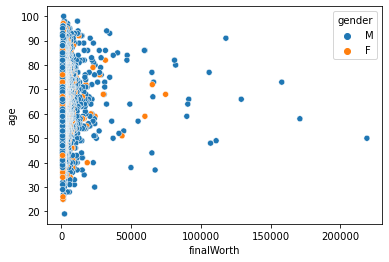

In [43]:
sns.scatterplot(data=billionaires, y = 'age', x = 'finalWorth', hue= 'gender')

#Insight 1 :This chart displays the figuers that are on relation between the age and the Final Worth of every Billionaire by also showing their gender 

Therefore, the mayority of the billionaires have a FinalWorth less than 50000 and those that are more than 50000 are Male and just 3 Female on that range 

<AxesSubplot:xlabel='gender', ylabel='count'>

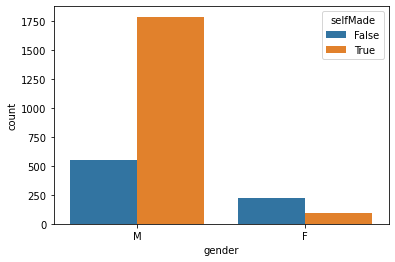

In [44]:
sns.countplot(data=billionaires, x='gender', hue='selfMade')

Insight 2: Chart that display those Billionares by gender and selfMade 

Therefore, Mayority of Mal where selfMade  and the Mayority of Female were not selfMade  

In [45]:
grp_FWG = billionaires.groupby('gender').mean()['finalWorth']

In [46]:
grp_FWG

gender
F    4647.266881
M    4759.696711
Name: finalWorth, dtype: float64

<BarContainer object of 2 artists>

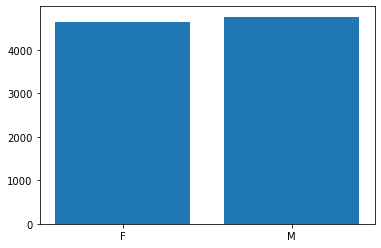

In [47]:
plt.bar(grp_FWG.index, grp_FWG.values)

Insights 3: This chart shows Billionaires by Group gender and the mean of the final worth. 

Here you can see that the difference between male and female Billionaires is not that different however Males are still in the lead. 

In [48]:
dts_billionairescountry.head(5)

,country,numBils,bilsPerMil
0,United States,724,1.853
1,China,698,0.276
2,India,237,0.171
3,Germany,136,1.553
4,Russia,117,0.677


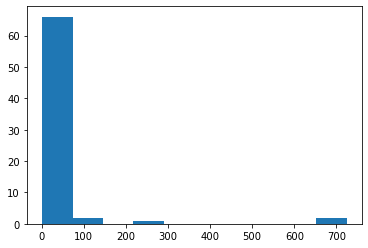

In [50]:
plt.hist(dts_billionairescountry['numBils'])
plt.show()

Insight 4 : Chart showing the Number of billionaires by Country 




<AxesSubplot:xlabel='country', ylabel='bilsPerMil'>

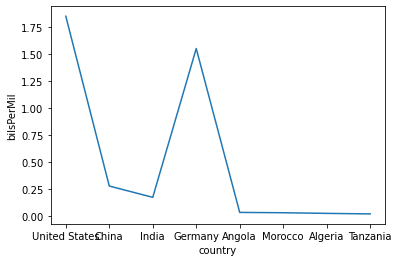

In [51]:
sns.lineplot(data=dts_billionairescountry.iloc[['0','1','2','3','67','68','69','70']], x='country', y='bilsPerMil')


<AxesSubplot:xlabel='country', ylabel='numBils'>

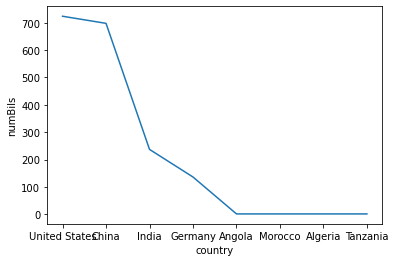

In [52]:
sns.lineplot(data=dts_billionairescountry.iloc[['0','1','2','3','67','68','69','70']], x='country', y='numBils')


In [53]:
dts_firstworld.head(2)

,hdiRank,country,hdi2019,pop2022
0,1,Norway,0.957,5511.370
1,2,Switzerland,0.955,8773.637


<AxesSubplot:xlabel='hdi2019', ylabel='pop2022'>

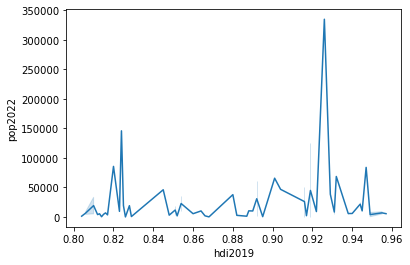

In [54]:
sns.lineplot(data=dts_firstworld, x='hdi2019', y='pop2022')

<AxesSubplot:xlabel='hdi2019', ylabel='Count'>

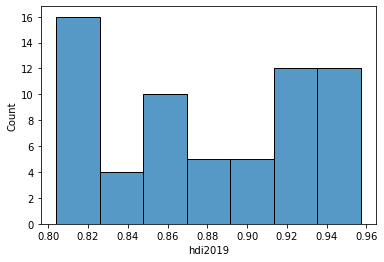

In [55]:
sns.histplot(dts_firstworld['hdi2019'])

Machine Learning 

Correlations on the Data Sets

In [57]:
billionaires.corr()

,rank,age,finalWorth,year,month,selfMade,philanthropyScore,numberOfSiblings
rank,1.000000,-0.129878,-0.437261,NaN,NaN,0.065436,0.043902,-0.096931
age,-0.129878,1.000000,0.041423,NaN,NaN,-0.086010,0.221939,0.268062
finalWorth,-0.437261,0.041423,1.000000,NaN,NaN,-0.022941,0.020995,0.153465
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selfMade,0.065436,-0.086010,-0.022941,NaN,NaN,1.000000,0.059796,0.232797
philanthropyScore,0.043902,0.221939,0.020995,NaN,NaN,0.059796,1.000000,-0.435906
numberOfSiblings,-0.096931,0.268062,0.153465,NaN,NaN,0.232797,-0.435906,1.000000


<AxesSubplot:>

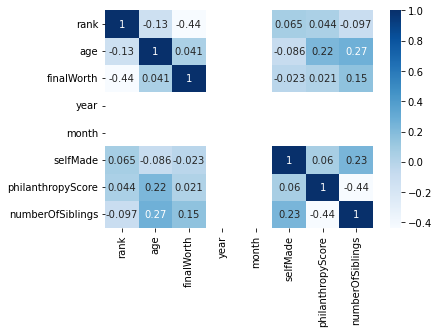

In [58]:
sns.heatmap(billionaires.corr(), annot= True, cmap='Blues')

In [59]:
dts_billionairescountry.corr()

,numBils,bilsPerMil
numBils,1.000000,-0.047924
bilsPerMil,-0.047924,1.000000


<AxesSubplot:>

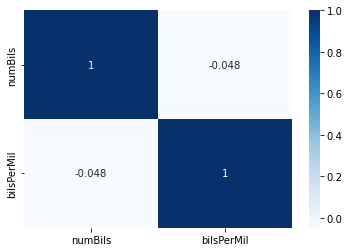

In [60]:
sns.heatmap(dts_billionairescountry.corr(), annot= True, cmap='Blues')

In [61]:
dts_firstworld.corr()

,hdiRank,hdi2019,pop2022
hdiRank,1.000000,-0.994501,-0.123712
hdi2019,-0.994501,1.000000,0.130867
pop2022,-0.123712,0.130867,1.000000


<AxesSubplot:>

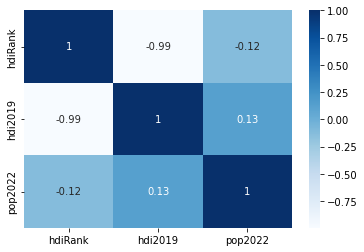

In [62]:
sns.heatmap(dts_firstworld.corr(), annot= True, cmap='Blues')